####Logistic regresion

In [0]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


In [46]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 2.12084863e-01,  7.84559029e-01],
       [ 1.30635617e+00,  4.77442019e+00],
       [ 5.21955009e-01,  3.47158454e+00],
       [-4.99246743e-01,  4.31181298e+00],
       [-3.35436889e+00,  2.56240436e+00],
       [ 2.08368902e+00,  1.34785422e+00],
       [-1.46861917e+00, -3.04448784e+00],
       [-4.19362462e+00, -5.36144729e+00],
       [ 5.95887477e-01,  7.69728132e-02],
       [ 1.03150111e+00,  3.78474254e-01],
       [-3.06627699e-01,  9.20548262e-01],
       [ 4.56367279e+00,  3.19798454e-01],
       [ 4.02248375e+00,  4.29687228e+00],
       [ 3.79042328e+00, -2.61252108e+00],
       [ 2.10008984e+00,  1.28255726e+00],
       [-1.74377137e+00, -1.24035369e+00],
       [ 1.17630475e+00,  7.17165708e+00],
       [ 3.91971076e+00,  5.88143463e+00],
       [ 5.50364613e+00,  2.79927164e+00],
       [-2.03185794e+00,  8.26849923e-01],
       [-3.90520181e+00, -4.60114693e+00],
       [-1.52255899e+00,  1.31716410e+00],
       [ 1.00573033e-01,  4.07803795e+00],
       [-5.

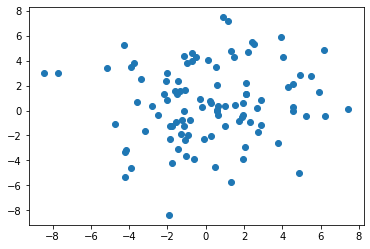

In [47]:
plt.scatter(data[:, 0], data[:, 1])

####Focus group

In [0]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

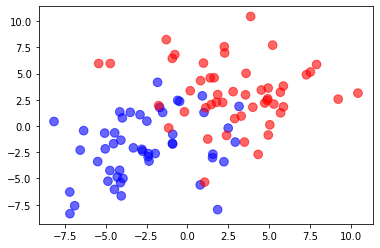

In [49]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [56]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2638, grad_fn=<BinaryCrossEntropyBackward>)

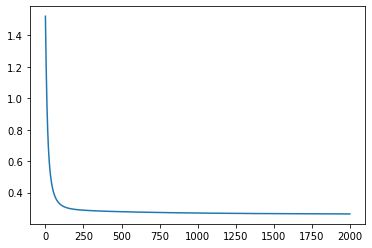

In [57]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss



In [58]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])



blue
red


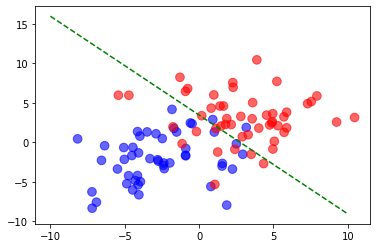

In [55]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')